### Version 1 - High Level Overview

In [4]:
from image_prep import get_img_df, train_val_test_split
from image_gen import get_gen_from_df

In [5]:
fc_path = "data/Food_Classification/"

# get df
df_fc = get_img_df(fc_path)

num_classes = len(df_fc['label'].unique())
num_classes

20

In [6]:
# split dfs
train, validate, test = train_val_test_split(df_fc, test_size=0.2, val_size=0.2)

In [7]:
train_gen = get_gen_from_df(train)
validate_gen = get_gen_from_df(validate, train=False)

Found 3587 validated image filenames belonging to 20 classes.
Found 1197 validated image filenames belonging to 20 classes.


c:\Users\Jon\miniconda3\envs\Tasty_AI\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


The following model is probably not the final model we want to use but just needed something to test and end to end flow.  

This particular architecture was borrowed from the Jupyter notebook found: https://www.kaggle.com/code/varsha300/transferlearning


In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Constants
IMG_SIZE = (224, 224)  # VGG16 default image size

# model

base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)))
# Freeze base model layers and unfreeze the last 4 layers
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Model architecture
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile model
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])


KeyboardInterrupt: 

In [ ]:
# Train model
history = model.fit(train_gen, validation_data=validate_gen, epochs=1, steps_per_epoch=train_gen.num_batches)


In [ ]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validate_gen)
print(f'Validation accuracy: {val_accuracy * 100:.2f}%')

### Version 2 - Find Best Model

In [1]:
import cv_models 

%load_ext autoreload
%autoreload 2

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4060 Laptop GPU, compute capability 8.9


#### Using Class

In [ ]:
"""
Best Accuracy: 0.13067729771137238
Best validation set: Model_Xception__Dropout_0.3__HiddenSize_200

Validation accuracy: 13.78%
Best Accuracy: 0.1378486007452011
Best validation set: Model_Xception__Dropout_0.2__HiddenSize_500
"""


# store results in each run in case of exception
for best_acc, best_model_name, best_dropout, best_hidden, all_results in cv_models.find_best_model(5, batch_size=16):
    continue



**********
Training: Model_Xception__Dropout_0.2__HiddenSize_500**********

Found 3587 validated image filenames belonging to 20 classes.
Found 1197 validated image filenames belonging to 20 classes.


c:\Users\Jon\miniconda3\envs\Tasty_AI\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/5
224/224 [==============================] - 92s 399ms/step - loss: 7.0524 - accuracy: 0.1255 - val_loss: 5.8858 - val_accuracy: 0.2323
Epoch 2/5
224/224 [==============================] - 93s 415ms/step - loss: 6.9755 - accuracy: 0.1697 - val_loss: 7.8322 - val_accuracy: 0.2221
Epoch 3/5
224/224 [==============================] - 93s 414ms/step - loss: 7.1112 - accuracy: 0.1621 - val_loss: 7.5197 - val_accuracy: 0.2627
Epoch 4/5
224/224 [==============================] - 97s 433ms/step - loss: 7.3150 - accuracy: 0.1831 - val_loss: 9.6244 - val_accuracy: 0.3167
Epoch 5/5
75/75 [==============================] - 19s 256ms/step - loss: 8.9611 - accuracy: 0.2548
Validation accuracy: 25.48%
Best Accuracy: 0.25480368733406067
Best validation set: Model_Xception__Dropout_0.2__HiddenSize_500
**********
Training: Model_VGG16__Dropout_0.2__HiddenSize_500**********

Found 3587 validated image filenames belonging to 20 classes.
Found 1197 validated image filenames belonging to 20 classes.

c:\Users\Jon\miniconda3\envs\Tasty_AI\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


AttributeError: 'tuple' object has no attribute 'trainable'

#### Using Function

In [2]:
"""
base_model_names = [
    'Xception',
    'VGG16',
    'ResNet152V2',
    'InceptionResNetV2',
    'NASNetLarge',
    'EfficientNetB4',
    'EfficientNetB5',
    'EfficientNetB6',
    'EfficientNetB7'
]
"""

base_model = cv_models.get_base_model('VGG16')


In [ ]:
#base_model.trainable = False
#base_model.summary(show_trainable=True)

In [3]:
epochs = 40
dropout = 0.5
hidden = 4096
batch_size=32
lr = 1e-3
df_train, df_validate, _ = cv_models.get_split_data()

history, model, val_loss, val_accuracy = cv_models.train_transfer_model_2(
                    base_model, df_train, df_validate, epochs=epochs, dropout=dropout, hidden_size=hidden, 
                    batch_size=batch_size, bulk_train=False, lr=lr)




Found 3587 validated image filenames belonging to 20 classes.
Found 1197 validated image filenames belonging to 20 classes.


c:\Users\Jon\miniconda3\envs\Tasty_AI\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 2 invalid image filename(s) in x_col="path". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/40
112/112 [==============================] - 87s 749ms/step - loss: 3.0666 - accuracy: 0.2461 - val_loss: 2.0827 - val_accuracy: 0.4088 - lr: 0.0010
Epoch 2/40
112/112 [==============================] - 84s 749ms/step - loss: 2.0840 - accuracy: 0.3927 - val_loss: 1.5255 - val_accuracy: 0.5836 - lr: 0.0010
Epoch 3/40
112/112 [==============================] - 83s 738ms/step - loss: 1.8178 - accuracy: 0.4433 - val_loss: 1.5826 - val_accuracy: 0.4966 - lr: 0.0010
Epoch 4/40
112/112 [==============================] - 85s 760ms/step - loss: 1.7495 - accuracy: 0.4568 - val_loss: 1.4974 - val_accuracy: 0.5414 - lr: 0.0010
Epoch 5/40
112/112 [==============================] - 93s 832ms/step - loss: 1.7632 - accuracy: 0.4653 - val_loss: 1.5934 - val_accuracy: 0.5127 - lr: 0.0010
Epoch 6/40
112/112 [==============================] - 92s 821ms/step - loss: 1.7447 - accuracy: 0.4639 - val_loss: 1.6856 - val_accuracy: 0.4840 - lr: 0.0010
Epoch 7/40
112/112 [==============================] 

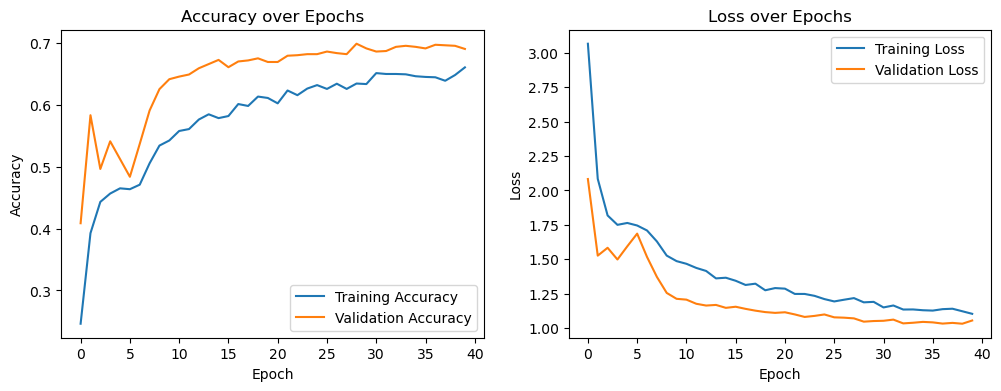

In [4]:
import matplotlib.pyplot as plt
# Plotting training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#len(list(history.history.values())[0])
#history

In [5]:
# path to model
path = 'models/cv_model.keras'
model.save(path)

In [6]:
#model = cv_models.get_tasty_model(base_model, num_classes=20, hidden_size=hidden_size, dropout=dropout)    
    

In [7]:
#model.compile(optimizer=Adam(learning_rate=lr),
#                  loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#model

In [ ]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("TensorFlow is using GPU")
    for gpu in gpus:
        print("GPU:", gpu.name)
else:
    print("TensorFlow is not using GPU")

In [2]:
def predict(path_to_image, top=3):
    import keras
    import cv2
    import numpy as np
    
    import os
    labels = os.listdir('data/Food_Classification/')
    labels = [l for l in labels if not l.endswith('xz')]

    model_path = 'models/cv_model.keras'
    model = keras.models.load_model(model_path)

    image = cv2.imread(path_to_image)
    image = cv2.resize(image,(224,224))
    image = np.reshape(image,[1,224,224,3])

    scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    x = scale_layer(image)
    
    preds_out = model.predict(x) 
    #return preds_out
    softmax = keras.layers.Softmax()
    sm_preds = softmax(preds_out)[0]

    idx = np.argsort(sm_preds)[::-1]
#    return idx

    return [labels[i] for i in idx[:top]]   


samosa_image = 'data/Food_Classification/samosa/002.jpg'
predict(samosa_image, 3) # ['chole_bhature', 'dal_makhani', 'momos']



1/1 [==============================] - 0s 135ms/step


['pakode', 'kadai_paneer', 'samosa']

In [ ]:
import os
labels = os.listdir('data/Food_Classification/')


labels

['burger',
 'butter_naan',
 'chai',
 'chapati',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa']

In [ ]:
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np
import seaborn as sns

# Confusion Matrix
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Calculate precision, recall, F1 score, and accuracy
report = classification_report(y_true, y_pred_classes, output_dict=True)
accuracy = report['accuracy']
precision = report['macro avg']['precision']
recall = report['macro avg']['recall']
f1_score = report['macro avg']['f1-score']

# Display the calculated metrics
print(f'Validation Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')

In [ ]:
import os
labels = os.listdir('data/Food_Classification/')


['masala_dosa', 'butter_naan', 'chole_bhature']